# USL Project - Sree Bhargava

# Part One - Automobile Domain  Max. Marks - 25

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import and Warehouse Automobile Data - Max. Marks - 3 

In [2]:
df_automobile1 = pd.read_csv("/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Part1 - Car name.csv")
print(df_automobile1.head(5),'\n')
print('Shape of Dataset\n',df_automobile1.shape,'\n')
print('Size of Dataset\n',df_automobile1.size,'\n')


                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino 

Shape of Dataset
 (398, 1) 

Size of Dataset
 398 



In [3]:
df_automobile_json = pd.read_json('/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Part1 - Car-Attributes.json') 

print(df_automobile_json.head(5),'\n')
print('Shape of Dataset\n',df_automobile_json.shape,'\n')
print('Size of Dataset\n',df_automobile_json.size,'\n')

    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1 

Shape of Dataset
 (398, 8) 

Size of Dataset
 3184 



In [4]:
# Place the DataFrames side by side - by columns
df_horizontal_stack = pd.concat([df_automobile1, df_automobile_json], axis=1) # stack dataframes by columns
df_horizontal_stack = df_horizontal_stack.reset_index(drop=True)
print(df_horizontal_stack.head(5),'\n')
print('Shape of Merged Dataset\n',df_horizontal_stack.shape,'\n')
Original_Size = df_horizontal_stack.size
print('Size of Merged Dataset\n',Original_Size,'\n')

                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1 

Shape of Merged Dataset
 (398, 9) 

Size of Merged Dataset
 3582 



# saving the dataframe to .csv , .xlsx and .json files in local machine

In [5]:
df_horizontal_stack.to_csv('/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Automobile_domain_merged.csv')
df_horizontal_stack.to_excel('/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Automobile_domain_merged.xlsx', sheet_name='Automobile_data_sheet', index = False)
df_horizontal_stack.to_json('/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Automobile_domain_merged.json')

# Data Cleansing - Max. Marks - 3

In [5]:
print('\nColumn Datatypes Info\n',df_horizontal_stack.dtypes,'\n')
# Get the unique values of 'hp' column
print('\nUnique values in horsepower column\n',df_horizontal_stack.hp.unique())

print('\nInvalid values in horsepower column\n',df_horizontal_stack.hp[df_horizontal_stack.hp=='?'])
print('\nInvalid values count in horsepower column\n',df_horizontal_stack.hp[df_horizontal_stack.hp=='?'].sum())


Column Datatypes Info
 car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object 


Unique values in horsepower column
 [130 165 150 140 198 220 215 225 190 170 160 95 97 85 88 46 87 90 113 200
 210 193 '?' 100 105 175 153 180 110 72 86 70 76 65 69 60 80 54 208 155
 112 92 145 137 158 167 94 107 230 49 75 91 122 67 83 78 52 61 93 148 129
 96 71 98 115 53 81 79 120 152 102 108 68 58 149 89 63 48 66 139 103 125
 133 138 135 142 77 62 132 84 64 74 116 82]

Invalid values in horsepower column
 32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

Invalid values count in horsepower column
 ??????


In [6]:
print('\nColumn Datatypes Info in detail\n',df_horizontal_stack.info(),'\n')

print('\nDescription Dataset\n',df_horizontal_stack.describe(),'\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB

Column Datatypes Info in detail
 None 


Description Dataset
               mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.0

In [7]:
df_horizontal_stack.hp = pd.to_numeric(df_horizontal_stack.hp, errors='coerce')  #Cast datatype of column
print('\nColumn Datatypes Info\n',df_horizontal_stack.dtypes,'\n')

# Checking for missing values
print("Missing value Details\n",df_horizontal_stack.isna().sum())

df_horizontal_stack = df_horizontal_stack.dropna() #dropping NaN values in horsepower column

# Checking for missing values Details after incorrect value treatment
print("Missing value Details after incorrect value treatment\n",df_horizontal_stack.isna().sum())



Column Datatypes Info
 car_name     object
mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object 

Missing value Details
 car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64
Missing value Details after incorrect value treatment
 car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64


In [8]:
print('Shape of Corrected Dataset\n',df_horizontal_stack.shape,'\n')
New_Size = df_horizontal_stack.size
print('Size of Corrected Dataset\n',New_Size,'\n')

Shape of Corrected Dataset
 (392, 9) 

Size of Corrected Dataset
 3528 



In [9]:

print("> Original:",Original_Size,"vs","New:",New_Size)

# Data drop impact analysis

Data_lost=100*((Original_Size-New_Size)/Original_Size)
print("> Percentage of data lost",Data_lost,"%")
if Data_lost<=5:
    print("\n> Not much data has been lost,dropping data was a good option")
else:
    print("\n> Considerable data has been lost,dropping data was not a good option. We need to impute data")

> Original: 3582 vs New: 3528
> Percentage of data lost 1.507537688442211 %

> Not much data has been lost,dropping data was a good option


# car name: string (which is unique for each instance) can be dropped off from dataframe as it is less useful in our data analysis

In [10]:
# Remove column 'car_name'
df_horizontal_stack = df_horizontal_stack.drop(['car_name'], axis = 1)

print('Shape of Corrected Dataset\n',df_horizontal_stack.shape,'\n')
print('Size of Corrected Dataset\n',df_horizontal_stack.size,'\n')
print('Print Sample data from dataframe\n',df_horizontal_stack.head(5),'\n')

Shape of Corrected Dataset
 (392, 8) 

Size of Corrected Dataset
 3136 

Print Sample data from dataframe
     mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1 



# Data Analysis & Visualization - Max. Marks - 4

In [11]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

minmax_scale # Range is 0 to 1

MinMaxScaler()

In [12]:
#Normalizing the appropriate attributes  
df_horizontal_stack1 = pd.DataFrame()
df_horizontal_stack1 = df_horizontal_stack
df_horizontal_stack1['disp'] = minmax_scale.fit_transform(df_horizontal_stack1[['disp']]) # returns z-scores of the values of the attribute
df_horizontal_stack1['hp'] = minmax_scale.fit_transform(df_horizontal_stack1[['hp']]) # returns z-scores of the values of the attribute
df_horizontal_stack1['wt'] = minmax_scale.fit_transform(df_horizontal_stack1[['wt']]) # returns z-scores of the values of the attribute
df_horizontal_stack1['acc'] = minmax_scale.fit_transform(df_horizontal_stack1[['acc']]) # returns z-scores of the values of the attribute
df_horizontal_stack1['mpg'] = minmax_scale.fit_transform(df_horizontal_stack1[['mpg']]) # returns z-scores of the values of the attribute
print(df_horizontal_stack1.head(5))

        mpg  cyl      disp        hp        wt       acc  yr  origin
0  0.239362    8  0.617571  0.456522  0.536150  0.238095  70       1
1  0.159574    8  0.728682  0.646739  0.589736  0.208333  70       1
2  0.239362    8  0.645995  0.565217  0.516870  0.178571  70       1
3  0.186170    8  0.609819  0.565217  0.516019  0.238095  70       1
4  0.212766    8  0.604651  0.510870  0.520556  0.148810  70       1


In [13]:
print("Unique Values in cylinder column \n",df_horizontal_stack1.cyl.unique(),"\n")
print("Unique Values in Model_Year column \n",df_horizontal_stack1.yr.unique(),"\n")
print("Unique Values in Car_Origin column \n",df_horizontal_stack1.origin.unique(),"\n")

print("Datatypes of columns in brief \n",df_horizontal_stack1.dtypes)

Unique Values in cylinder column 
 [8 4 6 3 5] 

Unique Values in Model_Year column 
 [70 71 72 73 74 75 76 77 78 79 80 81 82] 

Unique Values in Car_Origin column 
 [1 3 2] 

Datatypes of columns in brief 
 mpg       float64
cyl         int64
disp      float64
hp        float64
wt        float64
acc       float64
yr          int64
origin      int64
dtype: object


In [14]:
# Replcing Model-Year entries by Natural-numbers(age) maximum age for oldest year entry and minimum age for latest year entry

replaceStruct = {
                 "yr": {70:13, 71:12, 72:11, 73:10, 74:9, 75:8, 76:7, 77:6, 78:5, 79:4, 80:3, 81:2, 82:1}
                    }

df_horizontal_stack1=df_horizontal_stack1.replace(replaceStruct)
print("Unique Values in cylinder column \n",df_horizontal_stack1.cyl.unique(),"\n")
print("Unique Values in Model_Year column \n",df_horizontal_stack1.yr.unique(),"\n")
print("Unique Values in Car_Origin column \n",df_horizontal_stack1.origin.unique(),"\n")

print("sample of new ammended dataframe\n")
print(df_horizontal_stack1.head(5))

Unique Values in cylinder column 
 [8 4 6 3 5] 

Unique Values in Model_Year column 
 [13 12 11 10  9  8  7  6  5  4  3  2  1] 

Unique Values in Car_Origin column 
 [1 3 2] 

sample of new ammended dataframe

        mpg  cyl      disp        hp        wt       acc  yr  origin
0  0.239362    8  0.617571  0.456522  0.536150  0.238095  13       1
1  0.159574    8  0.728682  0.646739  0.589736  0.208333  13       1
2  0.239362    8  0.645995  0.565217  0.516870  0.178571  13       1
3  0.186170    8  0.609819  0.565217  0.516019  0.238095  13       1
4  0.212766    8  0.604651  0.510870  0.520556  0.148810  13       1


In [15]:
print("Describe the normalized-scaled dataframe for continuous variables alone\n")
print(df_horizontal_stack1[['mpg','disp','hp','wt','acc']].describe())

Describe the normalized-scaled dataframe for continuous variables alone

              mpg        disp          hp          wt         acc
count  392.000000  392.000000  392.000000  392.000000  392.000000
mean     0.384200    0.326646    0.317768    0.386897    0.448888
std      0.207580    0.270398    0.209191    0.240829    0.164218
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.212766    0.095607    0.157609    0.173589    0.343750
50%      0.365691    0.214470    0.258152    0.337539    0.446429
75%      0.531915    0.536822    0.434783    0.567550    0.537202
max      1.000000    1.000000    1.000000    1.000000    1.000000


In [16]:
# IQR for continuous variables in dataframe

Q1 = df_horizontal_stack1[['mpg','disp','hp','wt','acc']].quantile(0.25)
Q3 = df_horizontal_stack1[['mpg','disp','hp','wt','acc']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

mpg     0.319149
disp    0.441214
hp      0.277174
wt      0.393961
acc     0.193452
dtype: float64


In [17]:
# Removing Outliers from dataframe point of view, as a whole
# and creating new dataframe

df_horizontal_stack2 = df_horizontal_stack1.drop(np.where(
    (df_horizontal_stack1[['mpg','disp','hp','wt','acc']] < (Q1 - 1.5 * IQR)) | 
    (df_horizontal_stack1[['mpg','disp','hp','wt','acc']] > (Q3 + 1.5 * IQR)))[0],axis=0)

In [18]:


print("Shape of new DataFrame with outliers removed\n")
print(df_horizontal_stack2.shape)

Shape of new DataFrame with outliers removed

(373, 8)


In [19]:
print("Info\n")
print(df_horizontal_stack2.info())
print("Sample Data from the ammended DataFrame\n")
print(df_horizontal_stack2.head(5))

Info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     373 non-null    float64
 1   cyl     373 non-null    int64  
 2   disp    373 non-null    float64
 3   hp      373 non-null    float64
 4   wt      373 non-null    float64
 5   acc     373 non-null    float64
 6   yr      373 non-null    int64  
 7   origin  373 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 26.2 KB
None
Sample Data from the ammended DataFrame

        mpg  cyl      disp        hp        wt       acc  yr  origin
0  0.239362    8  0.617571  0.456522  0.536150  0.238095  13       1
1  0.159574    8  0.728682  0.646739  0.589736  0.208333  13       1
2  0.239362    8  0.645995  0.565217  0.516870  0.178571  13       1
3  0.186170    8  0.609819  0.565217  0.516019  0.238095  13       1
4  0.212766    8  0.604651  0.510870  0.520556  0.148810  13       1


<AxesSubplot:>

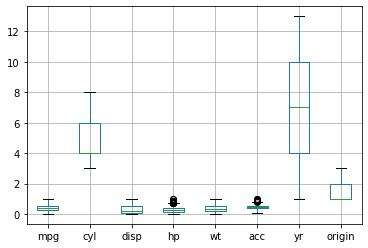

In [20]:
df_horizontal_stack2.boxplot()

# Uni-variate, Bi-variate and Multi-variate Analysis with hue as multi valued discrete variables one at a time

In [ ]:
sns.pairplot(df_horizontal_stack2,hue ='cyl')
plt.show()

In [ ]:
sns.pairplot(df_horizontal_stack2,hue ='yr')
plt.show()

In [ ]:
sns.pairplot(df_horizontal_stack2,hue ='origin')
plt.show()

In [ ]:
print(df_horizontal_stack2.corr())

In [ ]:
sns.heatmap(df_horizontal_stack2.corr(),annot = True)

In [31]:
df_horizontal_stack2[['cyl','mpg','disp','hp','wt','acc']].groupby(df_horizontal_stack2['cyl']).mean()

# data shows max mpg is for 4 cylinders vehicles

cyl       mpg      disp        hp        wt       acc
cyl                                                       
3      3  0.307181  0.011628  0.289402  0.222711  0.312500
4      4  0.538930  0.107552  0.175383  0.196369  0.510538
5      5  0.514628  0.149871  0.211957  0.362064  0.589286
6      6  0.289697  0.388682  0.303811  0.451634  0.489345
8      8  0.160520  0.701751  0.586957  0.710037  0.307870

In [21]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(df_horizontal_stack2['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
df_horizontal_stack2 = df_horizontal_stack2.join(one_hot)
df_horizontal_stack2.head(5)

mpg  cyl      disp        hp        wt       acc  yr  origin  \
0  0.239362    8  0.617571  0.456522  0.536150  0.238095  13       1   
1  0.159574    8  0.728682  0.646739  0.589736  0.208333  13       1   
2  0.239362    8  0.645995  0.565217  0.516870  0.178571  13       1   
3  0.186170    8  0.609819  0.565217  0.516019  0.238095  13       1   
4  0.212766    8  0.604651  0.510870  0.520556  0.148810  13       1   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

In [22]:
# Let us now remove duplicate/irrelevant columns
#df_horizontal_stack3 = pd.DataFrame()
df_horizontal_stack3 = df_horizontal_stack2.drop(['origin'], axis =1)

df_horizontal_stack3.head(5)
df_horizontal_stack3k = df_horizontal_stack3
df_horizontal_stack31 = df_horizontal_stack3


# Machine Learning - Max. Marks - 8

# K-Means Clustering

In [24]:
# Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(df_horizontal_stack3k)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

num_clusters  cluster_errors
0              1     6219.611729
1              2     2517.222190
2              3     1748.688056
3              4     1319.574440
4              5      988.896267
5              6      820.760644
6              7      711.839517
7              8      624.154535
8              9      551.168757
9             10      520.109034
10            11      457.215718
11            12      414.250850
12            13      379.978545
13            14      348.712193

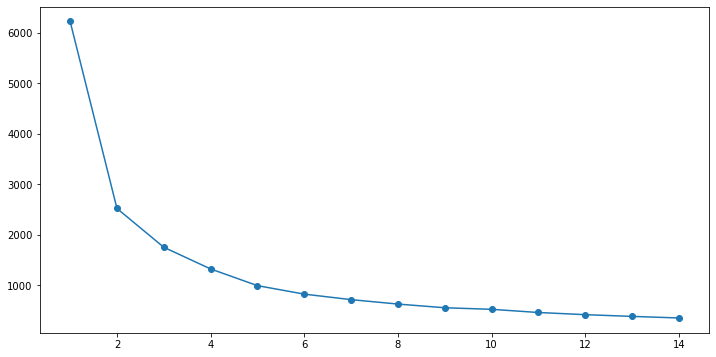

In [25]:
# Identify the appropriate clusters with result from above question using elbow method

from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [26]:
# We could see after 6, cluster error difference is minimal with increase in the choice of number of clusters

kmeans = KMeans(n_clusters=6, n_init = 5, random_state=12345)
kmeans.fit(df_horizontal_stack3k)

KMeans(n_clusters=6, n_init=5, random_state=12345)

# Check for no of values in each cluster and centers for each variables

In [27]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[61 61 35 65 93 58]


In [28]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_horizontal_stack3k) )
centroid_df.transpose()

0         1             2             3         4         5
mpg        0.430328  0.492501  2.848024e-01  1.624386e-01  0.613904  0.204971
cyl        4.000000  4.032787  6.914286e+00  7.415385e+00  4.236559  6.965517
disp       0.094760  0.109247  4.914729e-01  6.458756e-01  0.139618  0.542324
hp         0.194405  0.188435  3.944099e-01  5.428930e-01  0.180224  0.416979
wt         0.180458  0.206175  5.239985e-01  6.358771e-01  0.232535  0.615630
acc        0.511807  0.488486  4.476190e-01  3.127289e-01  0.504608  0.446531
yr        10.721311  6.344262  4.428571e+00  1.129231e+01  2.215054  7.482759
origin_1   0.213115  0.311475  9.428571e-01  1.000000e+00  0.451613  0.965517
origin_2   0.442623  0.344262  5.714286e-02 -1.942890e-16  0.172043  0.017241
origin_3   0.344262  0.344262 -5.551115e-17  1.942890e-16  0.376344  0.017241

# Group 1 has highest values for mpg while 3rd has lowest
# Group 5 has max no of cylinders and 0 forms of lower cylinder values
# Group 3 seems to be comprising of newest cars

# Assign the groups created above to data frame and study the characteristics for each group.


In [29]:
# Add cluster number to original cars data

predictions = kmeans.predict(df_horizontal_stack3k)
predictions
df_horizontal_stack3k["group"] = predictions
df_horizontal_stack3k['group'] = df_horizontal_stack3k['group'].astype('category')
df_horizontal_stack3k.dtypes

mpg          float64
cyl            int64
disp         float64
hp           float64
wt           float64
acc          float64
yr             int64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_3'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

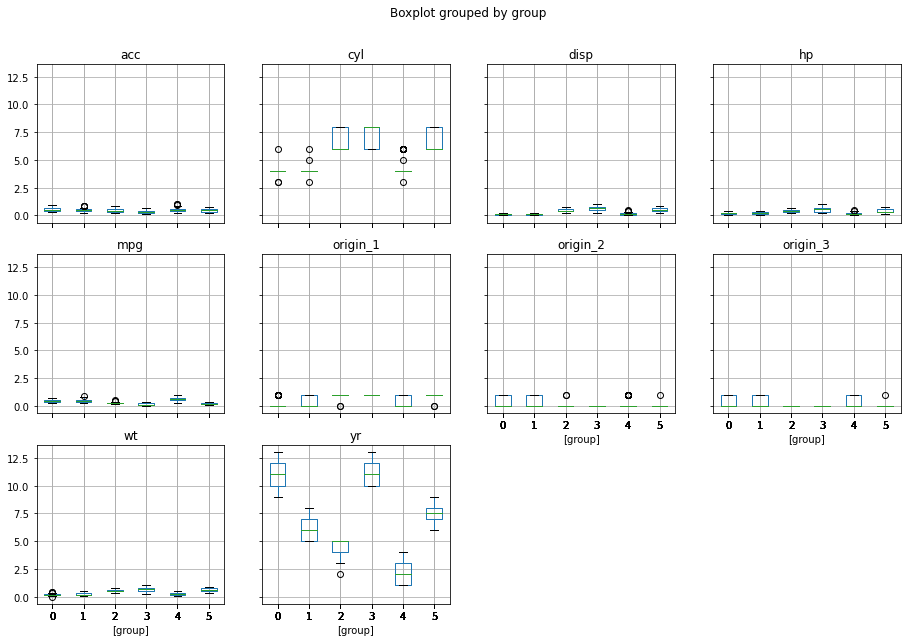

In [30]:
# Visualize the centers

df_horizontal_stack3k["group"] = predictions
df_horizontal_stack3k.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [ ]:
# Group 0 is characterised by lower acc, comparitely old models, lower wt, hp but lowest mpg with origin at 1

# Group 1 -lower mpg, lower wt and hp. higher age limits suggest comparitevly newer cars. Origin looks more at 0

# Group 2 - Origin mostly in location 2, lower deviation in wts, and hp so medain mpg and acceleration low

# Group 3 - Again slighlty higher in wt origin code as 1. lower performance in terms of mpg

# Group 4 - Again slighlty lower in wt origin code as 3. better performance in terms of mpg

# Group 5 - Again slighlty higher in wt origin code as 2. lower performance in terms of mpg


In [165]:
# Export the data into csv for any further analysis

df_horizontal_stack3k.to_csv('/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/ModelDataforFurtherAnalysis.csv')


In [166]:
df_horizontal_stack3k.head()

mpg  cyl      disp        hp        wt       acc  yr  origin_1  \
0  0.239362    8  0.617571  0.456522  0.536150  0.238095  13         1   
1  0.159574    8  0.728682  0.646739  0.589736  0.208333  13         1   
2  0.239362    8  0.645995  0.565217  0.516870  0.178571  13         1   
3  0.186170    8  0.609819  0.565217  0.516019  0.238095  13         1   
4  0.212766    8  0.604651  0.510870  0.520556  0.148810  13         1   

   origin_2  origin_3  group  
0         0         0      3  
1         0         0      3  
2         0         0      3  
3         0         0      3  
4         0         0      3

# Hierarchical Clustering

# Find out the linkage matrix

# Use average as linkage metric and distance as Eucledian

In [148]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [149]:
model.fit(df_horizontal_stack31)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [150]:
df_horizontal_stack31['labels'] = model.labels_
df_horizontal_stack31.head(5)

mpg  cyl      disp        hp        wt       acc  yr  origin_1  \
0  0.239362    8  0.617571  0.456522  0.536150  0.238095  13         1   
1  0.159574    8  0.728682  0.646739  0.589736  0.208333  13         1   
2  0.239362    8  0.645995  0.565217  0.516870  0.178571  13         1   
3  0.186170    8  0.609819  0.565217  0.516019  0.238095  13         1   
4  0.212766    8  0.604651  0.510870  0.520556  0.148810  13         1   

   origin_2  origin_3  labels  
0         0         0       0  
1         0         0       0  
2         0         0       0  
3         0         0       0  
4         0         0       0

In [151]:
df_horizontal_stack32 = df_horizontal_stack31.groupby(['labels'])

In [152]:
df_horizontal_stack32.mean()

mpg       cyl      disp        hp        wt       acc         yr  \
labels                                                                          
0       0.263892  6.000000  0.424023  0.411883  0.457203  0.392106  11.388350   
1       0.342729  5.662791  0.337360  0.308866  0.408277  0.462555   6.808140   
2       0.608880  4.285714  0.146601  0.182065  0.237483  0.509111   2.306122   

        origin_1  origin_2  origin_3  
labels                                
0       0.660194  0.203883  0.135922  
1       0.674419  0.156977  0.168605  
2       0.448980  0.193878  0.357143

In [153]:
df_horizontal_stack31.drop(['labels'],axis=1,inplace = True)
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

#df_horizontal_stack3.head(5)
Z = linkage(df_horizontal_stack31, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_horizontal_stack31))

c

0.6906394371208188

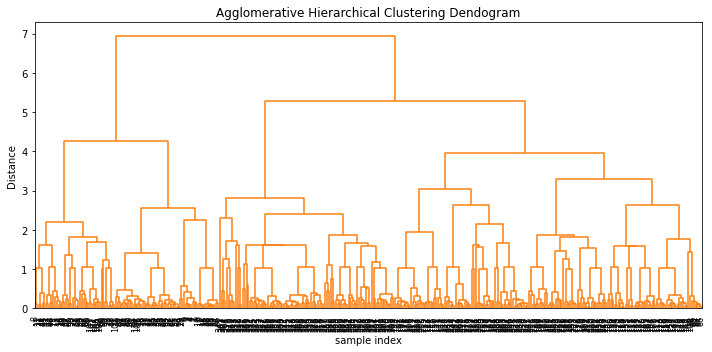

In [154]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [155]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_horizontal_stack31, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_horizontal_stack31))

c

0.6601386011490714

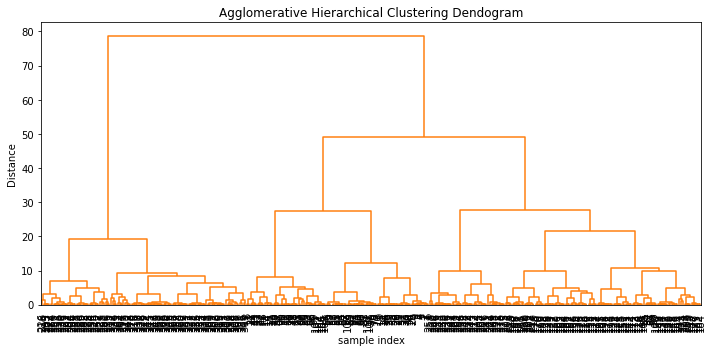

In [156]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In K-Means Method we analyze among the assumed-number/range of clusters and arrive at an optimum number of clusters based on elbow method.

In Hierarchical Clustering we follow two methods

Agglomerative Clustering and Divisive


In Agglomerative Clustering we start from individual data points and  go on merging/grouping datapoints into clusters depicting it as a dendrogram and we will stop we form/reach a single cluster

In Divisive we start from the single cluster at the top in the dendrogram and traverse down forming new sub clusters.

We slice the dendrogram at chosen height and analyse so that the cluster points have minimum variance i.e., the minimum sum of squares of distances from the cluster centroids and we can also check the silhoutte coefficient to analyse the same.

# Based on OutComes using ML Based Method Max. Marks - 5

# According to my understanding from the analysis the optimal number of clusters is "6" based on elbow method analysis done in above question because after that point on X-axis there is minimum change in distortion as we increase number of clusters

In [43]:
df_horizontal_stack4k = df_horizontal_stack3k.groupby(df_horizontal_stack3k['group'])
#print(df_horizontal_stack4k.head())
print(df_horizontal_stack4k['group'].dtype)
df_horizontal_stack5k0 = df_horizontal_stack3k.loc[(df_horizontal_stack3k['group'] == 0)]
print(df_horizontal_stack5k0.shape)
df_horizontal_stack5k1 = df_horizontal_stack3k.loc[(df_horizontal_stack3k['group'] == 1)]
print(df_horizontal_stack5k1.shape)
df_horizontal_stack5k2 = df_horizontal_stack3k.loc[(df_horizontal_stack3k['group'] == 2)]
print(df_horizontal_stack5k2.shape)
df_horizontal_stack5k3 = df_horizontal_stack3k.loc[(df_horizontal_stack3k['group'] == 3)]
print(df_horizontal_stack5k3.shape)
df_horizontal_stack5k4 = df_horizontal_stack3k.loc[(df_horizontal_stack3k['group'] == 4)]
print(df_horizontal_stack5k4.shape)
df_horizontal_stack5k5 = df_horizontal_stack3k.loc[(df_horizontal_stack3k['group'] == 5)]
print(df_horizontal_stack5k5.shape)

group
0    int32
1    int32
2    int32
3    int32
4    int32
5    int32
Name: group, dtype: object
(61, 11)
(61, 11)
(35, 11)
(65, 11)
(93, 11)
(58, 11)


# Linear Regression on different clusters

In [48]:
# Cluster-0 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_horizontal_stack5k0.drop(['mpg','group'], axis=1)
# the dependent variable
y = df_horizontal_stack5k0[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


print("\n\nPerformance on training set")
print(regression_model.score(X_train, y_train))

#out of sample score (R^2)
print("\nPerformance on test set")

print(regression_model.score(X_test, y_test))


The coefficient for cyl is 0.09301133460904856
The coefficient for disp is -0.3121159110266222
The coefficient for hp is 0.06654595424927938
The coefficient for wt is -1.0962190401086909
The coefficient for acc is -0.06795956478773041
The coefficient for yr is -0.000359654577293204
The coefficient for origin_1 is -0.010747392946401311
The coefficient for origin_2 is 0.021834772587057814
The coefficient for origin_3 is -0.011087379640665283
The intercept for our model is 0.30690291162105804


Performance on training set
0.6060963249474292

Performance on test set
0.4421345397483606


In [49]:
# Cluster-1 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_horizontal_stack5k1.drop(['mpg','group'], axis=1)
# the dependent variable
y = df_horizontal_stack5k1[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


print("\n\nPerformance on training set")
print(regression_model.score(X_train, y_train))

#out of sample score (R^2)
print("\nPerformance on test set")

print(regression_model.score(X_test, y_test))


The coefficient for cyl is -0.10444907088773886
The coefficient for disp is -0.09404517646423148
The coefficient for hp is -0.768878893045176
The coefficient for wt is -0.4242917269262129
The coefficient for acc is -0.11118046361669832
The coefficient for yr is -0.03639266632652718
The coefficient for origin_1 is -0.011504824917056487
The coefficient for origin_2 is 0.013886138031433794
The coefficient for origin_3 is -0.002381313114378433
The intercept for our model is 1.4430336424756638


Performance on training set
0.7986823036721353

Performance on test set
0.5194976375025921


In [50]:
# Cluster-2 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_horizontal_stack5k2.drop(['mpg','group'], axis=1)
# the dependent variable
y = df_horizontal_stack5k2[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


print("\n\nPerformance on training set")
print(regression_model.score(X_train, y_train))

#out of sample score (R^2)
print("\nPerformance on test set")

print(regression_model.score(X_test, y_test))


The coefficient for cyl is 0.03369420637119073
The coefficient for disp is -0.17208515375730016
The coefficient for hp is 0.04629512336070271
The coefficient for wt is -0.5806476134042297
The coefficient for acc is 0.05412660801109461
The coefficient for yr is -0.06209118399683629
The coefficient for origin_1 is 0.057416690233401214
The coefficient for origin_2 is -0.05741669023340072
The coefficient for origin_3 is 0.0
The intercept for our model is 0.6341865141966891


Performance on training set
0.7573946896242558

Performance on test set
0.22574762425174022


In [51]:
# Cluster-3 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_horizontal_stack5k3.drop(['mpg','group'], axis=1)
# the dependent variable
y = df_horizontal_stack5k3[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


print("\n\nPerformance on training set")
print(regression_model.score(X_train, y_train))

#out of sample score (R^2)
print("\nPerformance on test set")

print(regression_model.score(X_test, y_test))


The coefficient for cyl is -0.04275475650959104
The coefficient for disp is -0.07520741538533318
The coefficient for hp is -0.09845867172999176
The coefficient for wt is -0.11194589575848195
The coefficient for acc is -0.2854618314091398
The coefficient for yr is 0.007119077347945083
The coefficient for origin_1 is 0.0
The coefficient for origin_2 is 0.0
The coefficient for origin_3 is 0.0
The intercept for our model is 0.6563061101643511


Performance on training set
0.8583692228832829

Performance on test set
0.7478934198852791


In [52]:
# Cluster-4 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_horizontal_stack5k4.drop(['mpg','group'], axis=1)
# the dependent variable
y = df_horizontal_stack5k4[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


print("\n\nPerformance on training set")
print(regression_model.score(X_train, y_train))

#out of sample score (R^2)
print("\nPerformance on test set")

print(regression_model.score(X_test, y_test))


The coefficient for cyl is -0.0002979288913625482
The coefficient for disp is 0.5358740456092601
The coefficient for hp is -0.648754470954257
The coefficient for wt is -0.9817117728676522
The coefficient for acc is 0.03517807958120158
The coefficient for yr is -0.00389584059561695
The coefficient for origin_1 is -0.055677199852023025
The coefficient for origin_2 is 0.05596871858472306
The coefficient for origin_3 is -0.0002915187326960824
The intercept for our model is 0.9015159836951235


Performance on training set
0.6859035282399759

Performance on test set
0.2624684221717477


In [53]:
# Cluster-5 
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_horizontal_stack5k5.drop(['mpg','group'], axis=1)
# the dependent variable
y = df_horizontal_stack5k5[['mpg']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))


print("\n\nPerformance on training set")
print(regression_model.score(X_train, y_train))

#out of sample score (R^2)
print("\nPerformance on test set")

print(regression_model.score(X_test, y_test))


The coefficient for cyl is -0.05029281484395893
The coefficient for disp is -0.3335013933460139
The coefficient for hp is 0.13621349647023448
The coefficient for wt is 0.0954423886614025
The coefficient for acc is -0.15566738673164474
The coefficient for yr is -0.016248645960117547
The coefficient for origin_1 is 0.07425870946956674
The coefficient for origin_2 is -0.07425870946956802
The coefficient for origin_3 is 0.0
The intercept for our model is 0.7415097025069737


Performance on training set
0.6937846600776701

Performance on test set
0.43068147518352473


# Part Three - Automobile Domain  Max. Marks - 20

# Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [57]:
import pandas as pd
df_p3=pd.read_csv("/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Part3 - vehicle.csv")
print(df_p3.head(),"\n")

print('Shape of Dataset\n',df_p3.shape,'\n')
print('Size of Dataset\n',df_p3.size,'\n')
df_p3 = df_p3.dropna()

print('Shape of modified Dataset\n',df_p3.shape,'\n')
print('Size of modified Dataset\n',df_p3.size,'\n')
print("Info about the dataset\n",df_p3.info(),'\n')

   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

# Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [58]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df_p3['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

<AxesSubplot:>

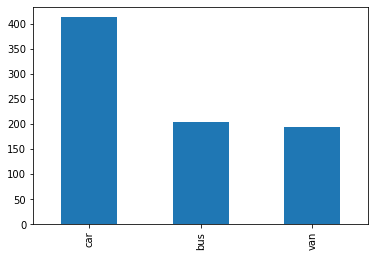

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df_p3["class"]).plot(kind="bar")

<AxesSubplot:>

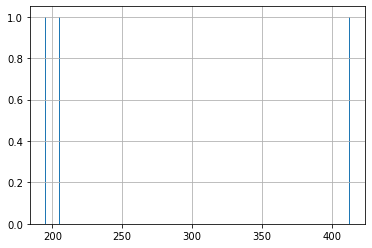

In [61]:
pd.value_counts(df_p3['class']).hist(bins=300)

In [62]:
df_p3.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Standardize the data

In [ ]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [65]:
interest_df_p3 = df_p3.drop('class', axis=1)
from scipy.stats import zscore
interest_df_p3_z = interest_df_p3.apply(zscore)

In [66]:
interest_df_p3_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

## BiVariate Plots

A bivariate analysis among the different independent variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

In [93]:
# dependant variable

replaceStruct = {
                 "class": {'car':1, 'van':2, 'bus':3}
                }

df_p3=df_p3.replace(replaceStruct)
y = df_p3[['class']]

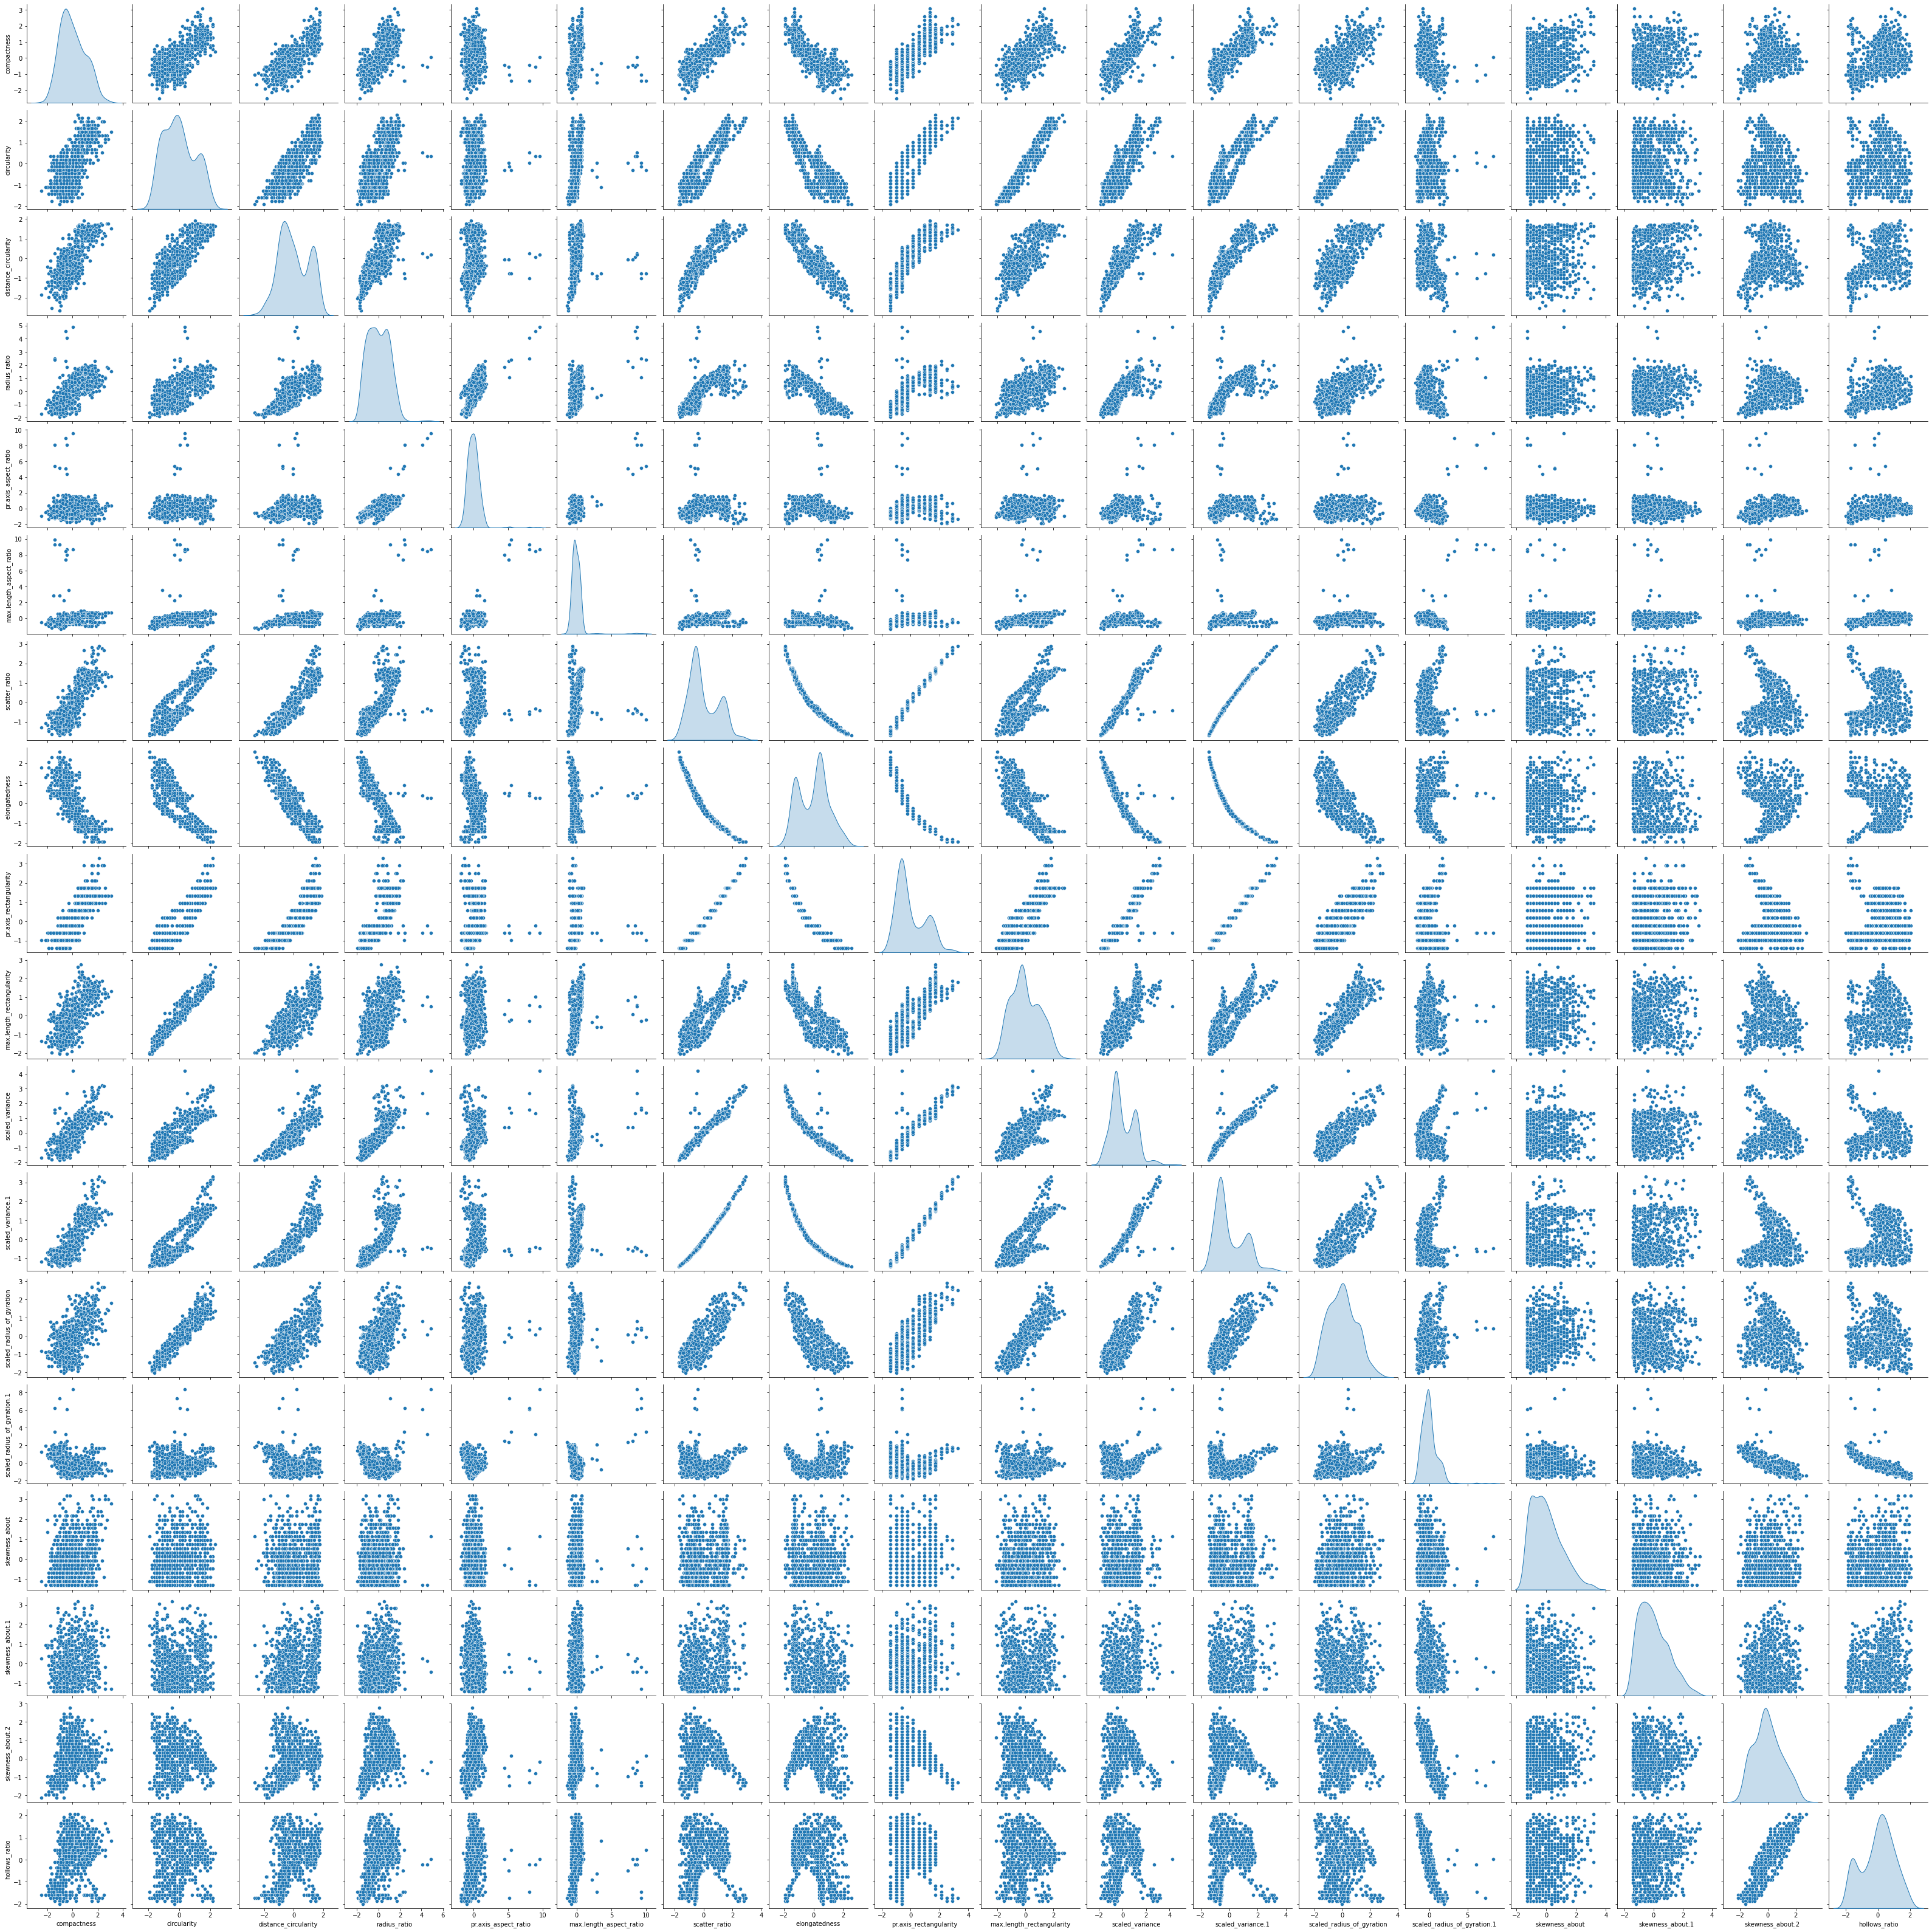

In [67]:
# independant variables
X = interest_df_p3_z

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the diag

# SVM Classifier for all data attributes

In [122]:
# Split X and y into training and test set in 70:30 ratio for all data atributes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.95


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 -0.19142882  0.0870987

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X)

PCA(n_components=18)

# The eigen Values

In [72]:
print(pca.explained_variance_)

[9.45338700e+00 2.98961888e+00 1.91768721e+00 1.17011696e+00
 9.29094522e-01 5.32171101e-01 3.59073770e-01 2.22360825e-01
 1.56093142e-01 9.28191209e-02 6.35293025e-02 4.43920604e-02
 3.47623783e-02 2.12103219e-02 1.61152840e-02 1.31079986e-02
 6.26175180e-03 3.65863172e-04]


# The eigen vectors

In [73]:
print(pca.components_)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

# And the percentage of variation explained by each eigen Vector

In [78]:
print(pca.explained_variance_ratio_)

[5.24542179e-01 1.65885645e-01 1.06407135e-01 6.49265390e-02
 5.15528736e-02 2.95286958e-02 1.99240058e-02 1.23381844e-02
 8.66117477e-03 5.15027513e-03 3.52506448e-03 2.46319209e-03
 1.92886778e-03 1.17690183e-03 8.94192335e-04 7.27326420e-04
 3.47447209e-04 2.03007309e-05]


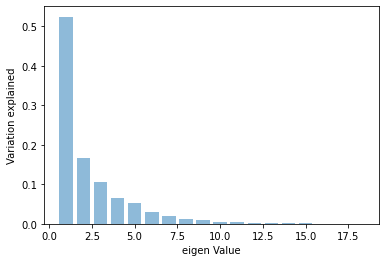

In [82]:
plt.bar(list(range(1,19)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

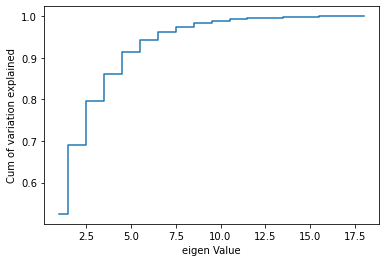

In [83]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 14 dimensions seems very reasonable. With 14 variables we can explain over 95% of the variation in the original data!

In [118]:
pca3 = PCA(n_components=14)
pca3.fit(X)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [119]:
Xpca3

array([[ 0.35224921, -0.14102681,  0.96183193, ...,  0.03537935,
        -0.18563737, -0.20219956],
       [-1.5780723 , -0.4221973 , -0.36526142, ..., -0.26589087,
        -0.04040576, -0.07029314],
       [ 3.78255625,  0.25325744,  0.06175618, ..., -0.14433318,
        -0.05846888, -0.06155844],
       ...,
       [ 4.83112974,  0.07323619,  0.48997353, ..., -0.39119237,
         0.06154145,  0.23406663],
       [-3.26941568, -1.01866536, -0.34344083, ...,  0.2147224 ,
         0.24578118, -0.2855387 ],
       [-4.75521696,  0.30767001, -0.58216391, ...,  0.12288902,
         0.44703962, -0.06955877]])

# SVM Classifier for reduced data attributes

In [123]:
# Split X and y into training and test set in 70:30 ratio for reduced data atributes

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.95


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


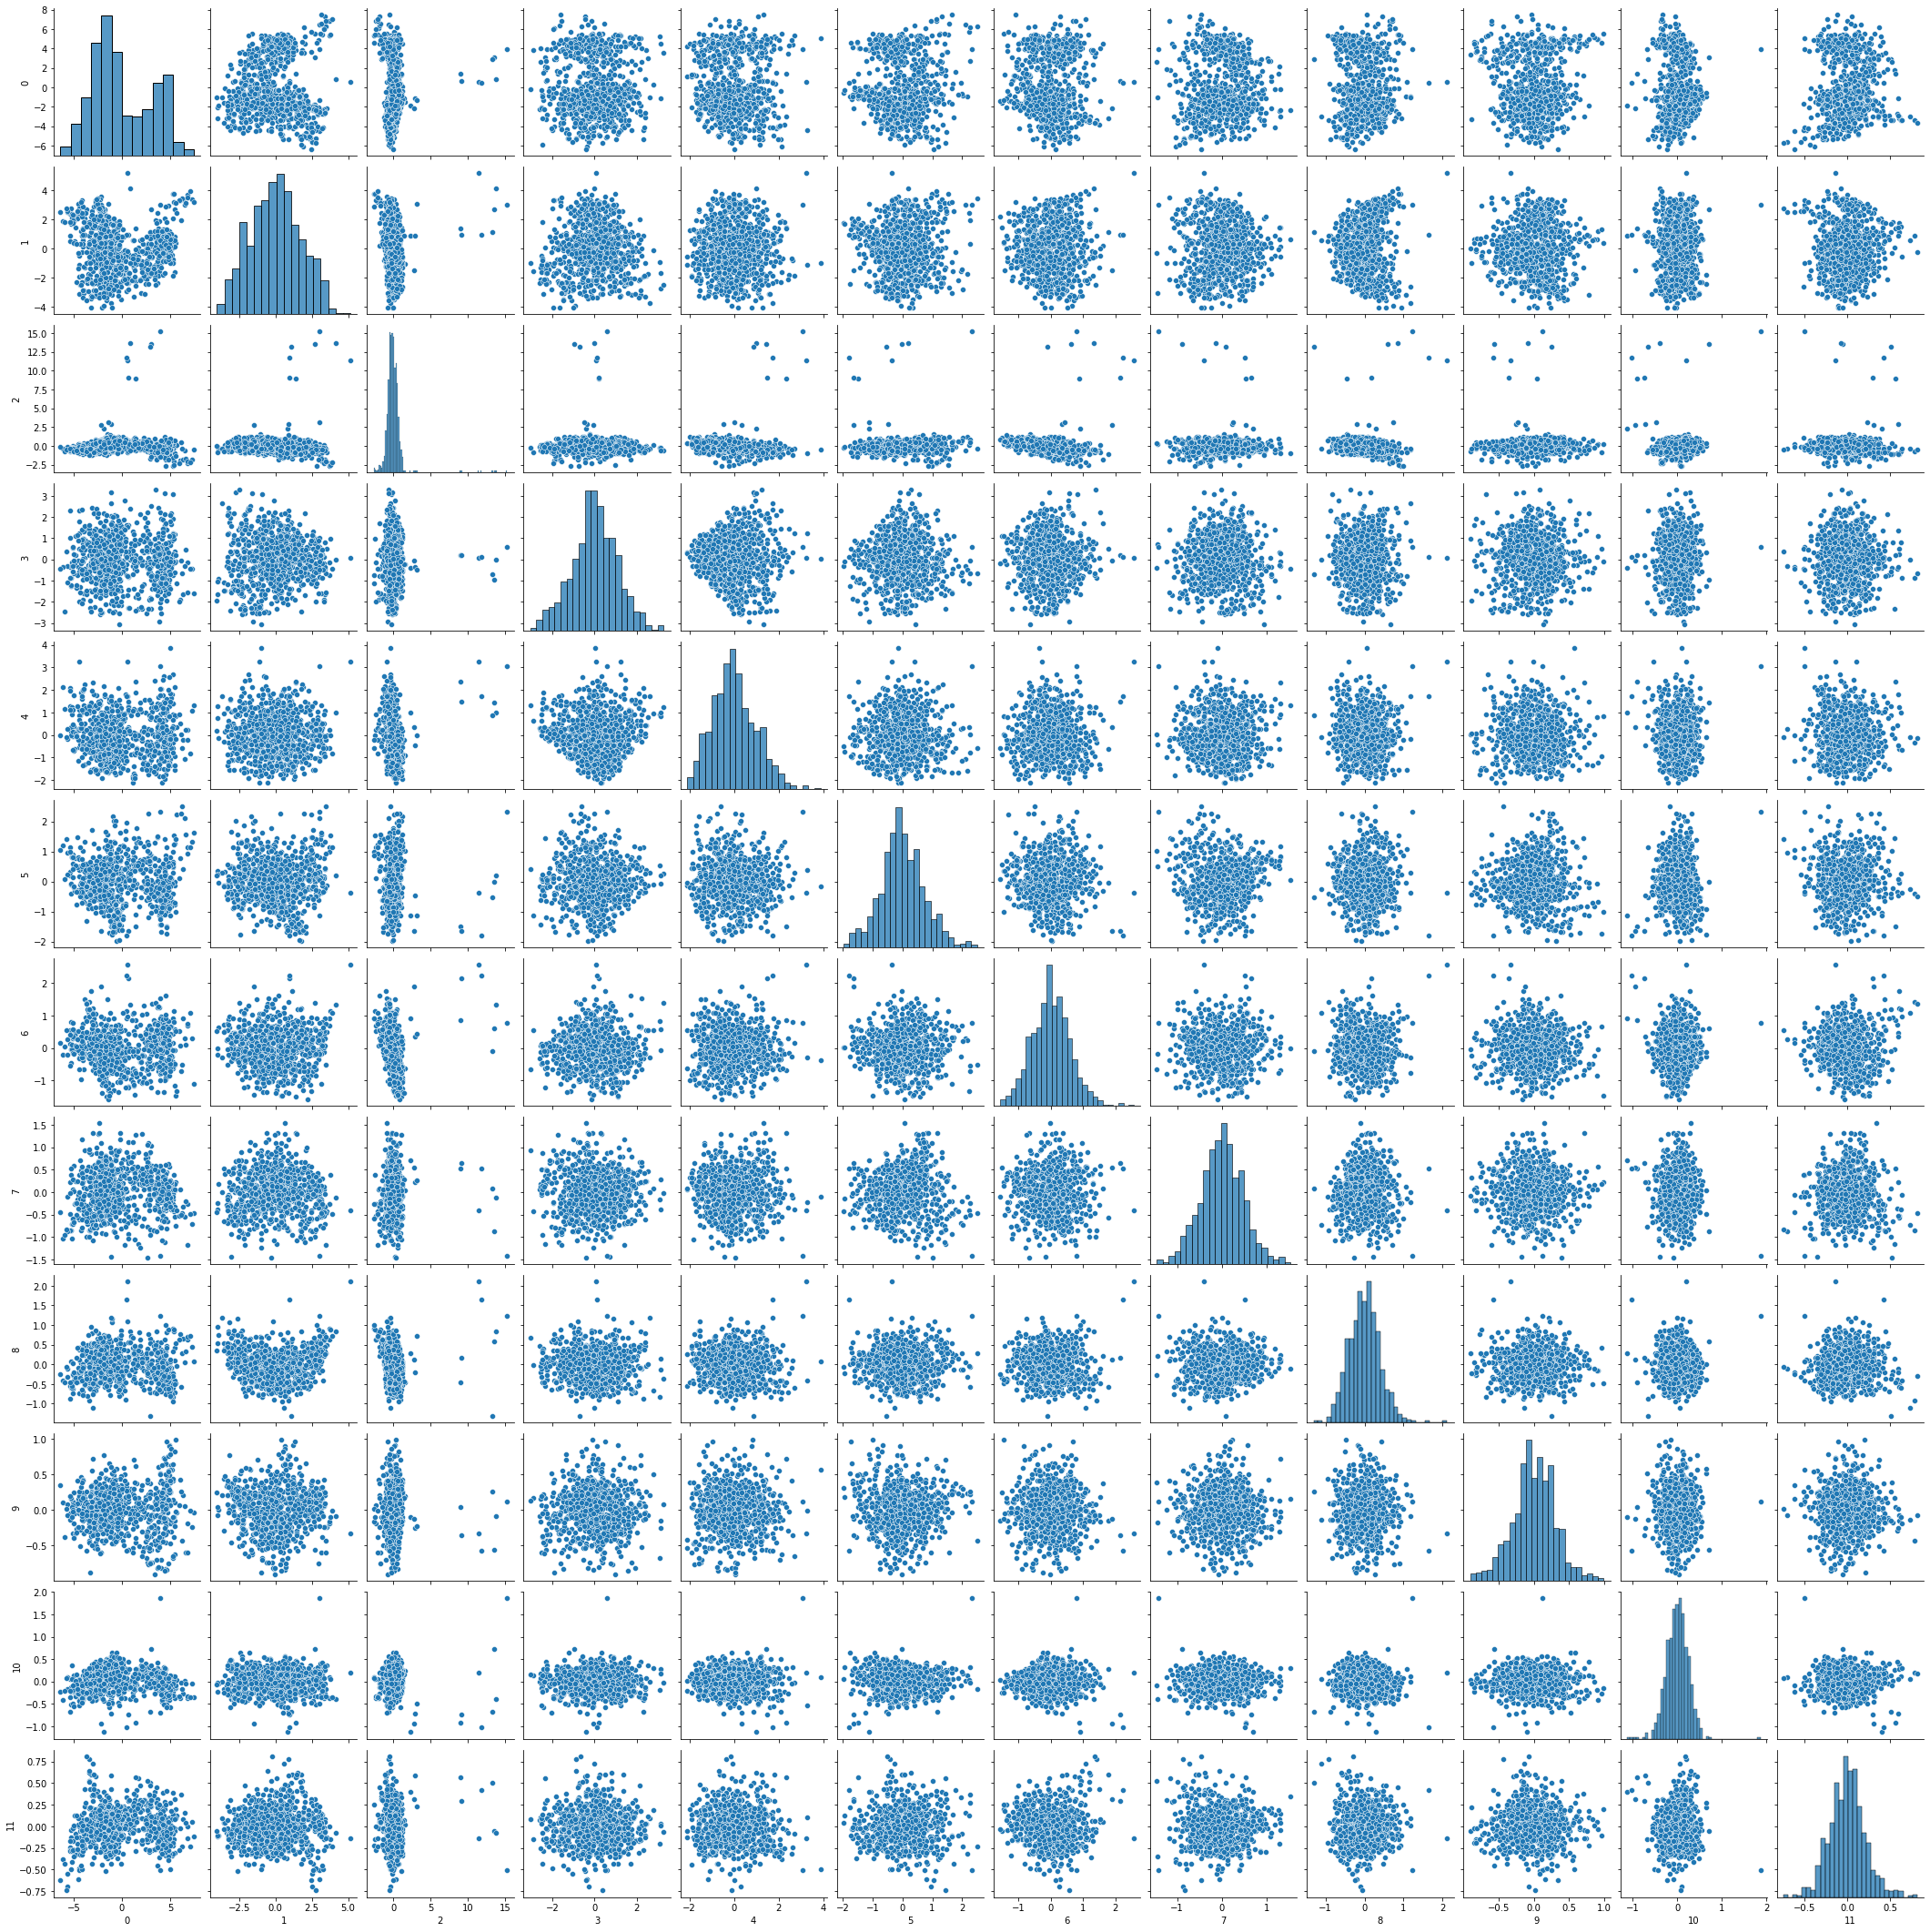

In [115]:
sns.pairplot(pd.DataFrame(Xpca3))

## Fit Linear Model

Lets construct two linear models. The first with all the 6 independent variables and the second with only the 3 new variables constructed using PCA.

In [120]:
regression_model = LinearRegression()
regression_model.fit(X, y)
regression_model.score(X, y)

0.7094240395776605

In [121]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.6693813969243874

# so by reducing dimensionality to 14 from 18 we could achieve good performance for this dataset

# In case of SVM classifier we could get more comparitive accuracy between training and test set for reduced data attributes

# Part Four - Sports Management Domain  Max. Marks - 5

In [2]:
import pandas as pd
df_part4=pd.read_csv("/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Part4 - batting_bowling_ipl_bat.csv")
print(df_part4.head(),"\n")

print('Shape of Dataset\n',df_part4.shape,'\n')
print('Size of Dataset\n',df_part4.size,'\n')
df_part4 = df_part4.dropna()

print('Shape of modified Dataset\n',df_part4.shape,'\n')
print('Size of modified Dataset\n',df_part4.size,'\n')
print("Info about the dataset\n",df_part4.info(),'\n')

print(df_part4.head(),"\n")

        Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN 

Shape of Dataset
 (180, 7) 

Size of Dataset
 1260 

Shape of modified Dataset
 (90, 7) 

Size of modified Dataset
 630 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
Info about the dataset
 None 

        Name   Runs    Ave      S

In [5]:
df_part41 = df_part4.drop('Name', axis = 1)
print(df_part41.head(5))

    Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0


In [6]:
df_part41.isna().sum()

Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [10]:
from scipy.stats import zscore
interest_df_part41_z = df_part41.apply(zscore)
print(interest_df_part41_z.head(5))

       Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533


## BiVariate Plots

A bivariate analysis among the different independent variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

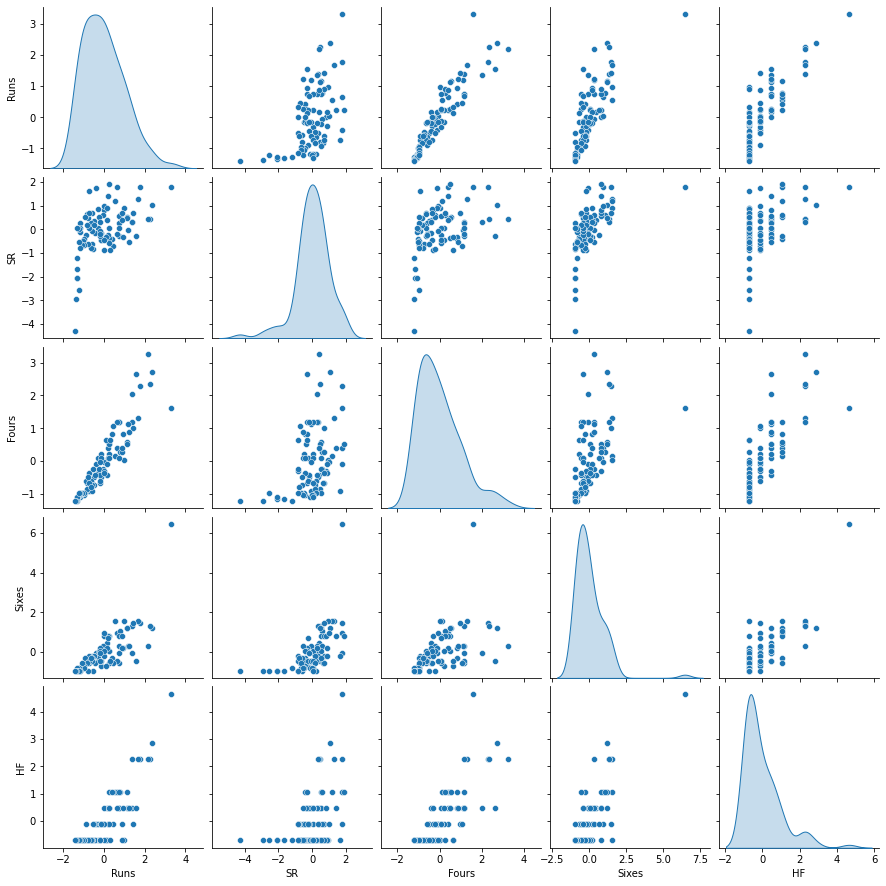

In [11]:
# dependant and independent variables
y = interest_df_part41_z["Ave"]
XSports = interest_df_part41_z.drop("Ave",axis = 1)

sns.pairplot(XSports, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [12]:
covMatrix = np.cov(XSports,rowvar=False)
print(covMatrix)

[[1.01123596 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.49903347 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.43238784 0.79249429 0.77632221 1.01123596]]


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(XSports)

PCA(n_components=5)

In [15]:
# Eigen Values
print(pca.explained_variance_,"\n")
# Eigen Vectors
print(pca.components_,"\n")

[3.68478222 0.76834943 0.4166537  0.16789085 0.01850358] 

[[ 0.50187534  0.33604567  0.45359181  0.44869171  0.47762398]
 [ 0.20984172 -0.81284324  0.423568   -0.27196631  0.20463821]
 [-0.10965304 -0.44684702 -0.50827022  0.67127805  0.28169331]
 [ 0.45896789 -0.15903601  0.08281919  0.36357126 -0.7905776 ]
 [ 0.6938388   0.0373425  -0.59130955 -0.37671182  0.16010769]] 



# And the percentage of variation explained by each eigen Vector

In [16]:
print(pca.explained_variance_ratio_)

[0.72876804 0.15196244 0.08240484 0.03320508 0.0036596 ]


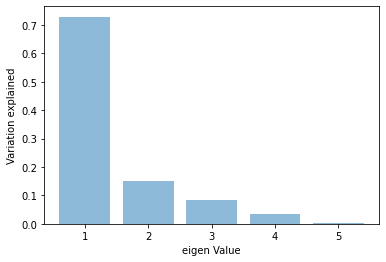

In [17]:
plt.bar(list(range(1,6)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

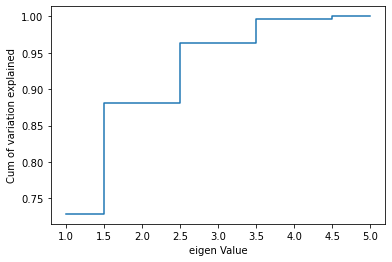

In [18]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [27]:
pca3 = PCA(n_components=4)
pca3.fit(XSports)
print(pca3.components_,'\n')
print(pca3.explained_variance_ratio_,'\n')
Xpca3 = pca3.transform(XSports)
print(Xpca3)

[[ 0.50187534  0.33604567  0.45359181  0.44869171  0.47762398]
 [ 0.20984172 -0.81284324  0.423568   -0.27196631  0.20463821]
 [-0.10965304 -0.44684702 -0.50827022  0.67127805  0.28169331]
 [ 0.45896789 -0.15903601  0.08281919  0.36357126 -0.7905776 ]] 

[0.72876804 0.15196244 0.08240484 0.03320508] 

[[ 8.10152541e+00 -8.68656663e-01  3.67987713e+00  3.97583906e-02]
 [ 4.67302663e+00  1.06967285e+00 -5.00270727e-01 -6.81748208e-01]
 [ 4.25240095e+00 -4.15434752e-02 -5.49913910e-01 -5.55250022e-01]
 [ 3.64711217e+00 -1.13804158e-01  2.63788127e-01 -5.59987734e-01]
 [ 4.01115296e+00  1.21110026e+00 -1.17052405e-01 -1.63522231e-01]
 [ 3.94415467e+00  1.87164752e+00 -1.24779561e+00 -4.77584361e-01]
 [ 1.95437354e+00 -1.00513298e+00  6.87681634e-01 -2.13029087e-01]
 [ 3.00043486e+00  6.37965836e-01  6.28250391e-01 -6.41375280e-01]
 [ 2.02559170e+00 -1.18722575e+00 -1.30246745e-01 -4.72919109e-01]
 [ 4.44815174e-01 -4.81765407e-01  4.43566041e-01 -2.51454279e-01]
 [ 1.86405364e+00 -1.289493

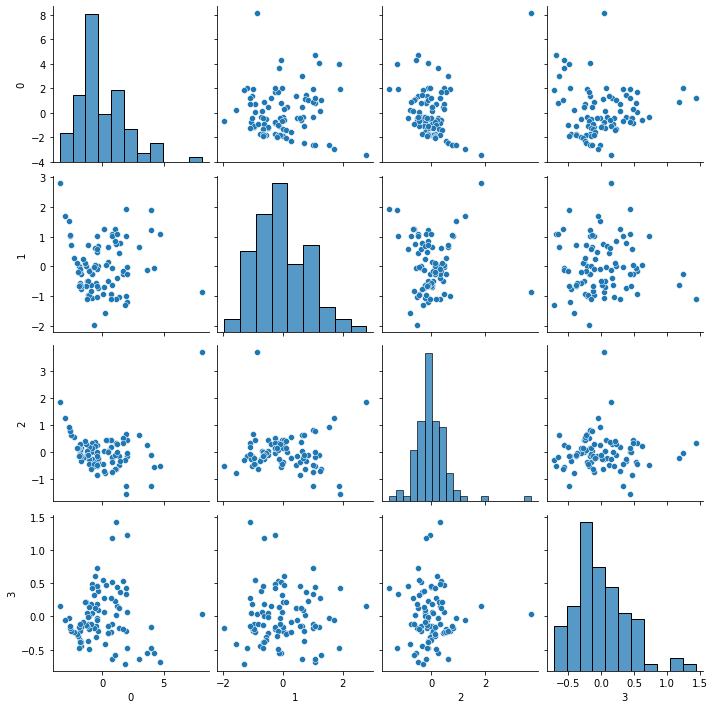

In [28]:
sns.pairplot(pd.DataFrame(Xpca3))

## Fit Linear Model

Lets construct two linear models. The first with all the 5 independent variables and the second with only the 3 new variables constructed using PCA.

In [29]:
# Split X and y into training and test set in 70:30 ratio for reduced data atributes


from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(XSports, y, test_size=0.30, random_state=1)




In [30]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.629767734490717
0.5150333681513715


In [31]:
# Split X and y into training and test set in 70:30 ratio for reduced data atributes


from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)


In [32]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train, y_train)
print(regression_model_pca.score(X_train, y_train))
print(regression_model_pca.score(X_test, y_test))

0.5815930623686547
0.6089787925970864


# so by reducing dimensionality to 5 from 3 we could achieve good performance for this dataset when training set performance and test set performance are compared

# K - Means Clustering

In [33]:
interest_df_part41_z.head(5)

Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

In [37]:
# Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(interest_df_part41_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

num_clusters  cluster_errors
0              1      540.000000
1              2      296.261354
2              3      223.365185
3              4      182.030943
4              5      148.526540
5              6      120.631926
6              7       96.333353
7              8       84.927956
8              9       73.278969
9             10       69.009464
10            11       64.660731
11            12       60.970396
12            13       56.167862
13            14       54.934786

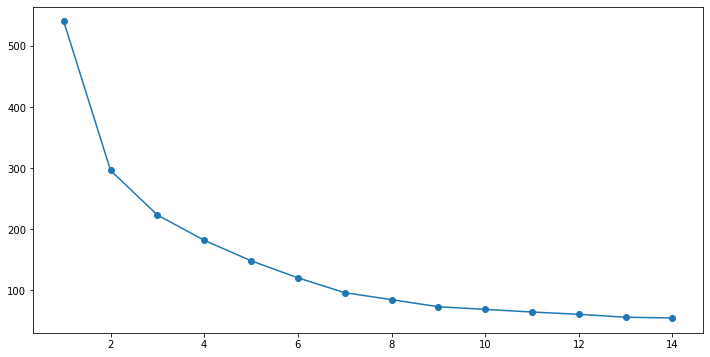

In [38]:
# Identify the appropriate clusters with result from above question using elbow method

from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [39]:
# We could see after 8, cluster error difference is minimal with increase in the choice of number of clusters

kmeans = KMeans(n_clusters=8, n_init = 5, random_state=12345)
kmeans.fit(interest_df_part41_z)

KMeans(n_init=5, random_state=12345)

In [40]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[13 21  6 12  7 12  1 18]


In [41]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(interest_df_part41_z))
centroid_df.transpose()

0         1         2         3         4         5         6  \
Runs   0.052410 -0.937345  1.937576  0.740535 -1.319810  0.893919  3.301945   
Ave   -0.136988 -0.856290  0.942538  1.341196 -1.526625  0.316277  2.683984   
SR    -0.387655 -0.242938  0.885701  0.922010 -2.403115 -0.121784  1.767325   
Fours  0.140297 -0.842584  2.179507  0.304204 -1.143333  1.157544  1.607207   
Sixes -0.294969 -0.689039  1.184173  1.048021 -0.934411 -0.051668  6.462679   
HF    -0.249908 -0.651274  2.368784  0.483020 -0.707989  0.532646  4.651551   

              7  
Runs  -0.349959  
Ave    0.123357  
SR     0.571044  
Fours -0.463971  
Sixes -0.037704  
HF    -0.509487

array([[<AxesSubplot:title={'center':'Ave'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Fours'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'HF'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Runs'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'SR'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'Sixes'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

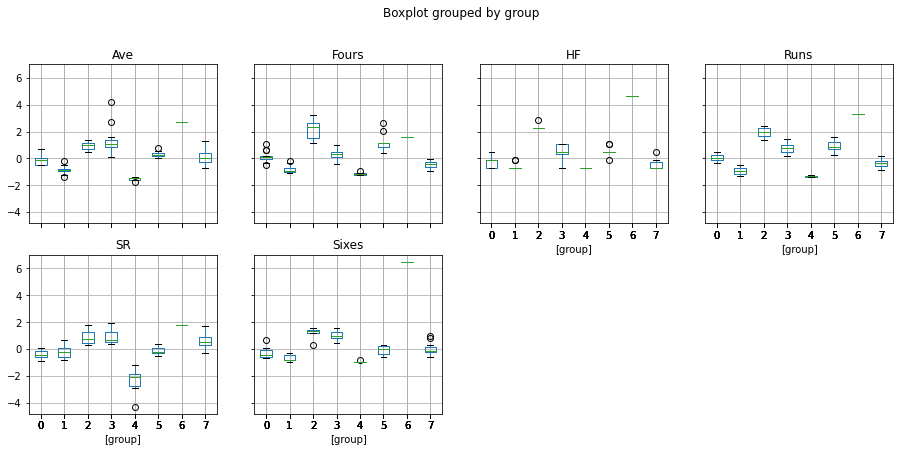

In [42]:
# Add cluster number to original cars data

predictions = kmeans.predict(interest_df_part41_z)
predictions
interest_df_part41_z["group"] = predictions
interest_df_part41_z['group'] = interest_df_part41_z['group'].astype('category')
interest_df_part41_z.dtypes

# Visualize the centers

interest_df_part41_z["group"] = predictions
interest_df_part41_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

# When it comes to average - 
# group/cluster of players to be preferred is in 
# precedence is 6>3>2>5>7> and so on

# When it comes to strike rate - 
# group/cluster of players to be preferred is in 
# precedence is 6>3>2>7> and so on which is slightly different 

# Depending on the business requirements they can decide whether to select the players with good average or good strike rate or with both characteristics into the team


# Part Two - Manufacturing Domain  Max. Marks - 5

In [189]:
df_manufac_prt2 = pd.read_excel("/Users/sree/Downloads/PGP_AIML/DataSets/05-21_Week3-UnsupervisedLearning/ProjectDataSets/Part2 - Company.xlsx")
print(df_manufac_prt2.head(),"\n")

print('Shape of Dataset\n',df_manufac_prt2.shape,'\n')
print('Size of Dataset\n',df_manufac_prt2.size,'\n')
#df_manufac_prt2 = df_manufac_prt2.dropna()

#print('Shape of modified Dataset\n',df_manufac_prt2.shape,'\n')
#print('Size of modified Dataset\n',df_manufac_prt2.size,'\n')
print("Info about the dataset\n",df_manufac_prt2.info(),'\n')
print(df_manufac_prt2.Quality.unique())

df_manufac_prt21 = df_manufac_prt2.loc[(df_manufac_prt2['Quality'] == "Quality A")|(df_manufac_prt2['Quality'] == "Quality B")]
print("Non Null Quality data",df_manufac_prt21.shape)

df_manufac_prt22 = df_manufac_prt2.loc[(df_manufac_prt2['Quality'] != "Quality A")&(df_manufac_prt2['Quality'] != "Quality B")]
print("To be imputed Quality data",df_manufac_prt22.shape)

     A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A 

Shape of Dataset
 (61, 5) 

Size of Dataset
 305 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB
Info about the dataset
 None 

['Quality A' 'Quality B' nan]
Non Null Quality data (43, 5)
To be imputed Quality data (18, 5)


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
# lets build our linear model
# independant variables
X = df_manufac_prt21.drop(['Quality'], axis=1)
# the dependent variable
y = df_manufac_prt21[['Quality']]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

print(dTree.score(X_train, y_train))
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))
print("\nEfficiency/Accuracy of the model on test data is \n")
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

1.0
   Imp
A  0.0
B  0.0
C  0.0
D  1.0

Efficiency/Accuracy of the model on test data is 

1.0


# Genereating synthetic data for the missing values in Wine Quality column and impute them
# in the place of null/missing records

In [190]:
X_test_imputed = df_manufac_prt22.drop(['Quality'], axis=1)
y_predict_toImpute = dTree.predict(X_test_imputed)
print(y_predict_toImpute)

['Quality B' 'Quality B' 'Quality B' 'Quality B' 'Quality B' 'Quality B'
 'Quality B' 'Quality B' 'Quality A' 'Quality B' 'Quality B' 'Quality B'
 'Quality B' 'Quality B' 'Quality B' 'Quality A' 'Quality B' 'Quality B']


In [196]:
df_manufac_prttoImputeMissedRecords = df_manufac_prt22
df_manufac_prttoImputeMissedRecords['Quality']=y_predict_toImpute
print(df_manufac_prttoImputeMissedRecords)

      A    B    C    D    Quality
2   159  163  135  131  Quality B
5   153  140  154  199  Quality B
7   191  144  143  154  Quality B
9   145  178  158  141  Quality B
14  186  142  146  174  Quality B
18  167  171  163  191  Quality B
23  171  185  181  183  Quality B
27  193  169  199  155  Quality B
29   29   49    6   35  Quality A
32  161  138  143  139  Quality B
35  181  147  174  130  Quality B
40  179  143  189  177  Quality B
46  197  173  165  197  Quality B
52  188  178  175  162  Quality B
57  137  182  165  199  Quality B
58   88   39    9  102  Quality A
59  180  157  192  198  Quality B
60  157  135  135  156  Quality B


<ipython-input-196-6bf82bdbaa8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manufac_prttoImputeMissedRecords['Quality']=y_predict_toImpute
